# An Exploratory Data Analysis of Diabetic and Potential Diabetic Patients

In [3]:
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st

%matplotlib inline

In [4]:
#Reading the csv file and converting it to a dataframe with pandas for analysis with name data
data = pd.read_csv('diabetes_data_upload.csv')

# 1. Understanding The Data

## This consists of an extensive exploration of the dataset to fully understand the contents and description of the dataset 

In [5]:
#Getting an overview of what the data contains
#Including the various columns that make up the dataset
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [13]:
# Checking the first 5 rows of the dataset to get an idea of the dataset
# This is to check to see if the data loading process was done appropriately
# The .head() method helps to get this in place
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [14]:
#Checking the last 5 rows of the dataset to get an idea of the dataset
#This is to check to see if the loading was done appropriately and none of the last five rows contain weird values
#The .tail() method helps to get this in place
data.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


##### The above output shows that the last 5 rows of our dataset has no issues

In [7]:
#This is to get the total number of rows and columns in the dataset
#This gives an overview of what the whole data entails
#It returns a tuple with the first entry for the rows and the second the total number of columns including the part for the ids given by Jupyter
data.shape

(520, 17)

In [15]:
#This gives an overview of the number of rows in the dataset
data.index

RangeIndex(start=0, stop=520, step=1)

In [16]:
#Also, it will be important to get the scope of numerical values in the dataset
#These will include the minimum, maximum, count, standard deviations and the various percentile values
#The results show that the max age is 91 and the max id is 5925. 
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [9]:
#Data is well explored when we know all that the values each column holds,
# their data types, and whether some have null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
Age                   520 non-null int64
Gender                520 non-null object
Polyuria              520 non-null object
Polydipsia            520 non-null object
sudden weight loss    520 non-null object
weakness              520 non-null object
Polyphagia            520 non-null object
Genital thrush        520 non-null object
visual blurring       520 non-null object
Itching               520 non-null object
Irritability          520 non-null object
delayed healing       520 non-null object
partial paresis       520 non-null object
muscle stiffness      520 non-null object
Alopecia              520 non-null object
Obesity               520 non-null object
class                 520 non-null object
dtypes: int64(1), object(16)
memory usage: 69.2+ KB


In [17]:
#In exploring this dataset, it will be great to know the various names of all the columns as a list
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [23]:
#To check whether any of the columns have a null value
#There are no missing values in the dataset
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

##### The output above shows that the age column values do not give a normal distribution.

In [24]:
#To get an array of the various unique gender values in the data
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
data['Gender'].describe()

count      520
unique       2
top       Male
freq       328
Name: Gender, dtype: object

In [22]:
#To get the total count of each value that makes up the gender column
data.Gender.value_counts(ascending=True, dropna=False)

Female    192
Male      328
Name: Gender, dtype: int64

In [42]:
#To the number of patients with alopecia (loss of hair from certain parts of the body)
data['Alopecia'].describe()

count     520
unique      2
top        No
freq      341
Name: Alopecia, dtype: object

In [ ]:
#Weakness seams to be very common amongst both diabetic and almost diabetic patients

In [41]:
#to get the stats for the number of patients who showed signs of weakness
data['weakness'].describe()

count     520
unique      2
top       Yes
freq      305
Name: weakness, dtype: object

In [43]:
#partial paresis-  weakening of muscles or a muscle group
data['partial paresis'].describe()

count     520
unique      2
top        No
freq      296
Name: partial paresis, dtype: object

#having most of the patients not experiencing delayed healing makes it less of an indicator for diabetes

In [30]:
data['delayed healing'].describe()

count     520
unique      2
top        No
freq      281
Name: delayed healing, dtype: object

In [34]:
#To get an array of the various unique threat_level values in the data
data['Obesity'].describe()

count     520
unique      2
top        No
freq      432
Name: Obesity, dtype: object

In [32]:
data['visual blurring'].describe()

count     520
unique      2
top        No
freq      287
Name: visual blurring, dtype: object

In [39]:
#polyuria- excessive urination
data['Polyuria'].describe()

count     520
unique      2
top        No
freq      262
Name: Polyuria, dtype: object

In [35]:
#To get an array of the various unique flee values in the data
data['sudden weight loss'].describe()

count     520
unique      2
top        No
freq      303
Name: sudden weight loss, dtype: object

In [40]:
data['Polydipsia'].describe()

count     520
unique      2
top        No
freq      287
Name: Polydipsia, dtype: object

In [38]:
data['class'].describe()

count          520
unique           2
top       Positive
freq           320
Name: class, dtype: object

In [44]:
data['muscle stiffness'].describe()

count     520
unique      2
top        No
freq      325
Name: muscle stiffness, dtype: object

In [46]:
data['Genital thrush'].describe()

count     520
unique      2
top        No
freq      404
Name: Genital thrush, dtype: object

In [53]:
data['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

## the above code means that diabetic and potential diabetic patients, averagely are adult

In [48]:
#Checking the skewness of the dataset
data.skew()

Age    0.329359
dtype: float64

In [49]:
#Checking the skewness of the dataset
data.kurt()

Age   -0.191709
dtype: float64

# 2. Cleaning The Data

## In the data cleaning process, we got rid of outliers, missing data, duplicates, inconsistent data and irregular that may affect our analysis.

## The dataset is wrangled afterwards in preparation for visualization.

### a. Checking if there are any missing values in the data

In [50]:
#Finding missing data values
#This code is to find the mean of the sum of null values in each column of the dataset and return it as a percentage
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Age - 0.0%
Gender - 0.0%
Polyuria - 0.0%
Polydipsia - 0.0%
sudden weight loss - 0.0%
weakness - 0.0%
Polyphagia - 0.0%
Genital thrush - 0.0%
visual blurring - 0.0%
Itching - 0.0%
Irritability - 0.0%
delayed healing - 0.0%
partial paresis - 0.0%
muscle stiffness - 0.0%
Alopecia - 0.0%
Obesity - 0.0%
class - 0.0%


##### The 0.0% showing for all the columns of the dataset shows that there no are missing values(null values) in the data. The above code adds up all the null values and find the mean and outputs it as a percentage. Since 0.0% was shown, it means that none of the columns have a null value

## Checking For Outliers In The Dataset

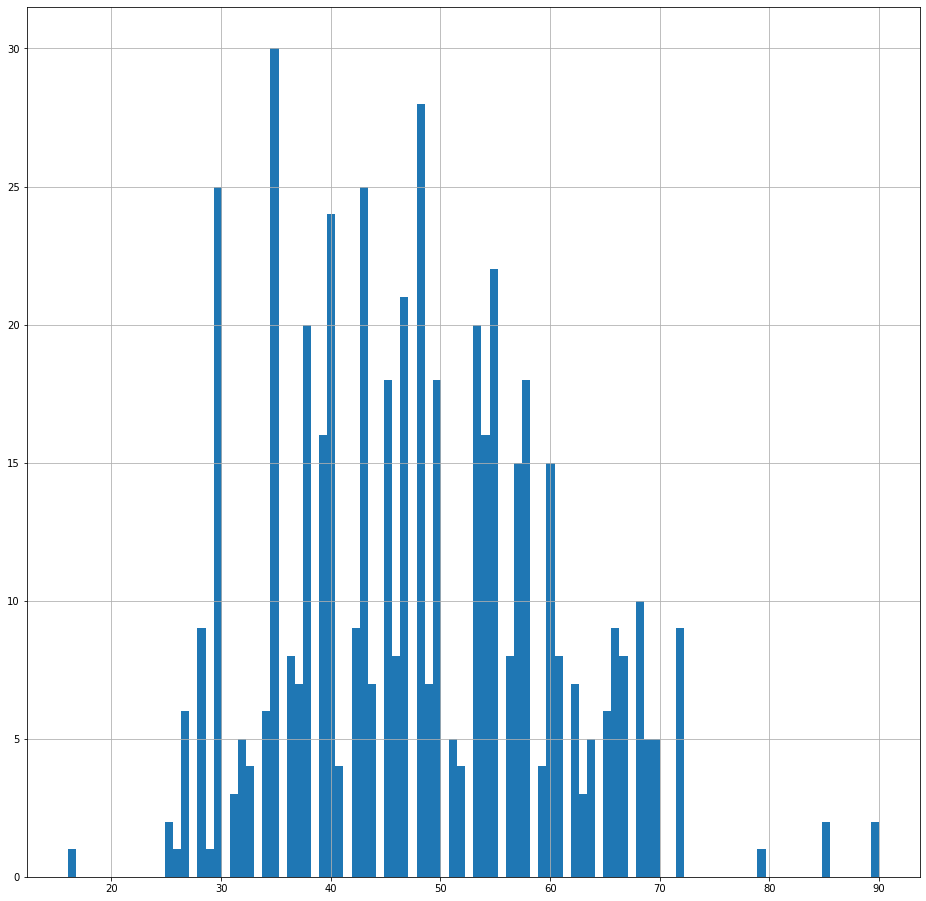

In [58]:
# histogram of age to show how the values are arranged
data['Age'].hist(bins=100, figsize=(16,16));

In [59]:
#This is to describe the age column by showing the various percentiles, max, min values etc
data['Age'].describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

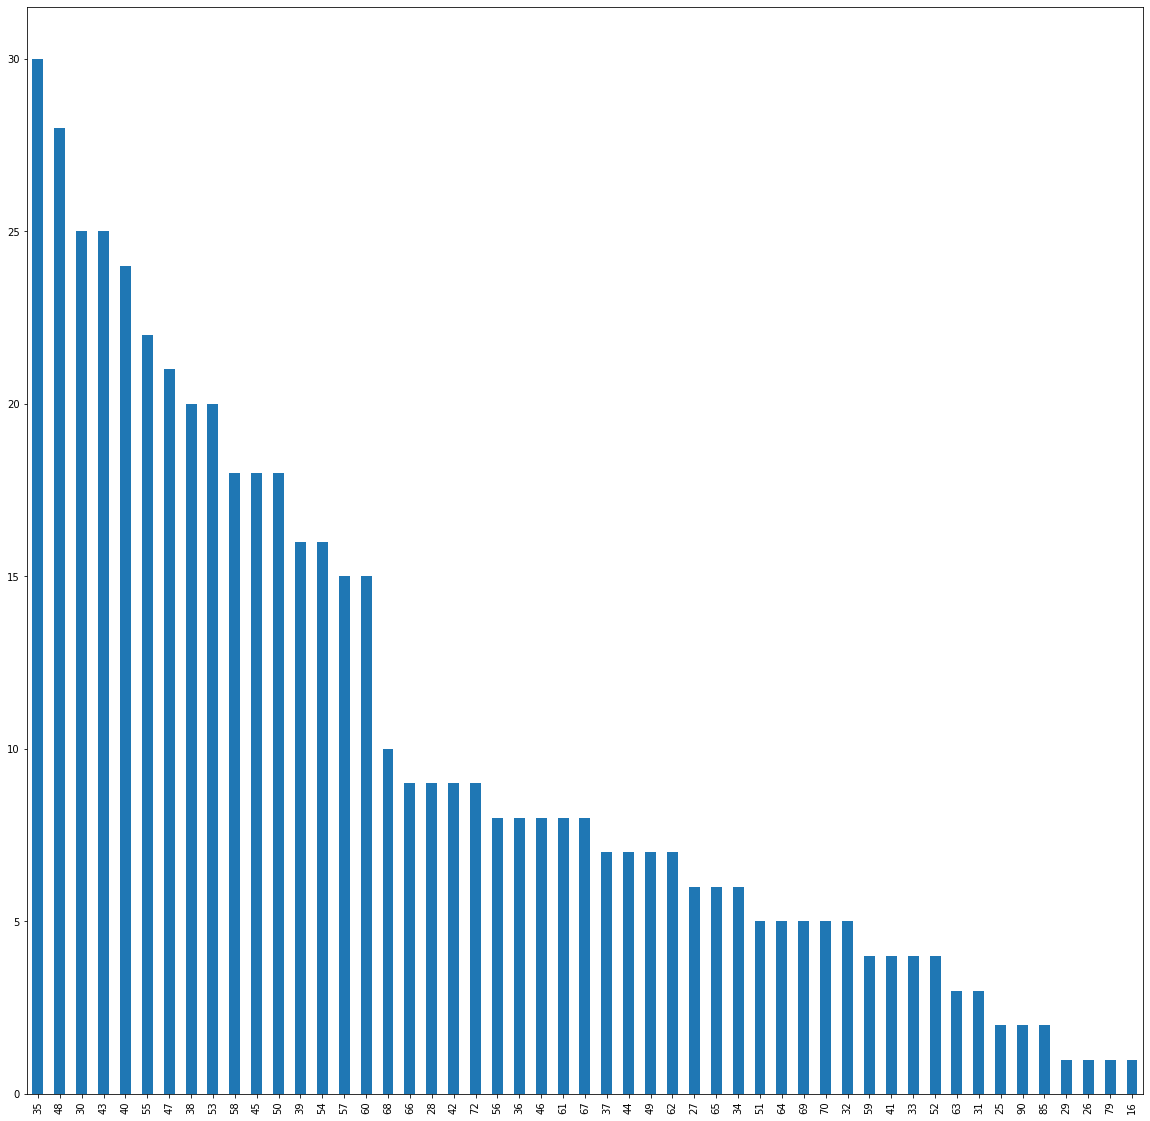

In [60]:
data['Age'].value_counts().plot.bar(figsize=(20,20));

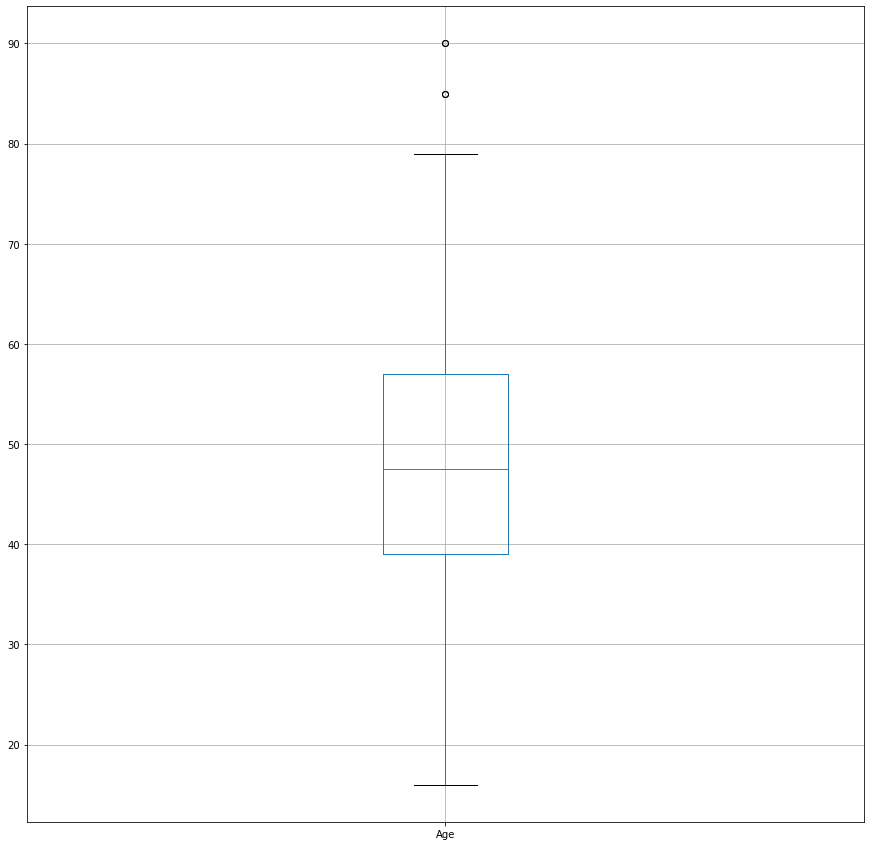

In [63]:
#To make a boxplot to show how the data is distributed
data.boxplot(column=['Age'], figsize=(15, 15));
#This boxplot shows that a few number of the ages are outliers

## Checking For Less Important Data In The DataSet

In [66]:
#This code is used to calculate the columns with more than 90% of the rows having the same values
#This is done to give an overview of the columns that should be given higher priority in the analysis of the data
num_rows = len(data.index)
low_information_cols = [] 

for col in data.columns:
    counts = data[col].value_counts(dropna=False)
    top_pct = (counts/num_rows).iloc[0]
    
    if top_pct > 0.90:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(counts)
        print()

## Checking For Inconsistent Data In The DataSet

This dataset in particular has no null values and all the values is seemingly binary, hence it leaves very little room for data inconsistencies.

# 3. Analysis Of Data ( Visualizations )
### This is made up of the various diagrams and charts showing the relationships between the variables

## (a) Visualizations Of Columns

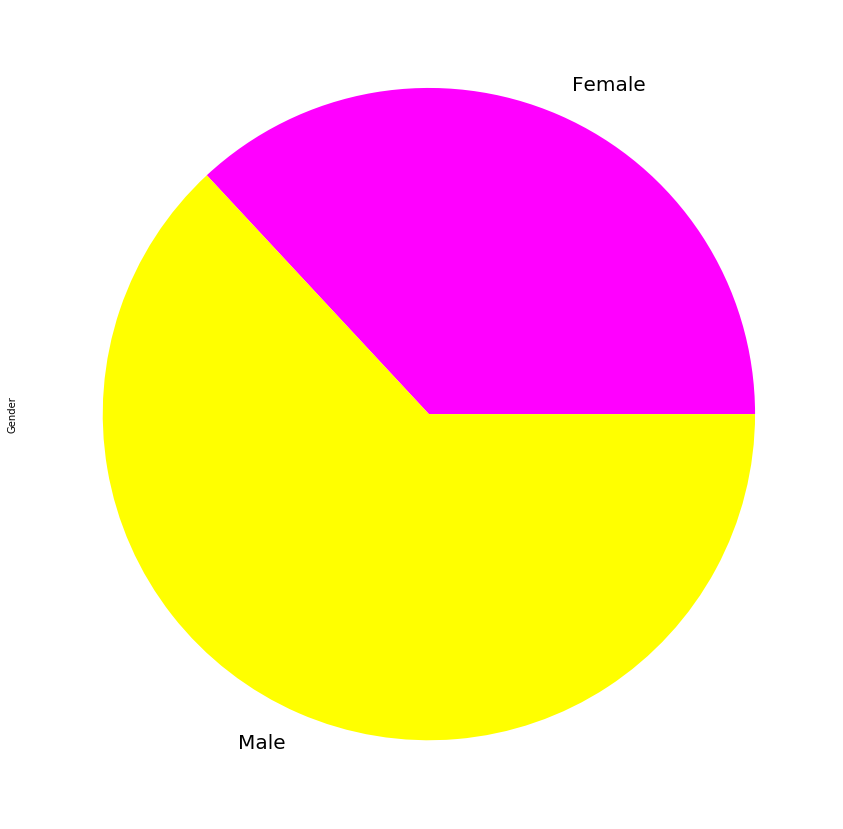

In [68]:
#This is to show the distribution of men and women who are either diabetic or potential diabetic patients
data['Gender'].value_counts(ascending=True).plot(kind='pie', figsize=(15,15), colormap='spring', grid =False, fontsize=20);

##### The output above shows that, men dorminated the research and so either showed signs of being diabetic or are diabetic

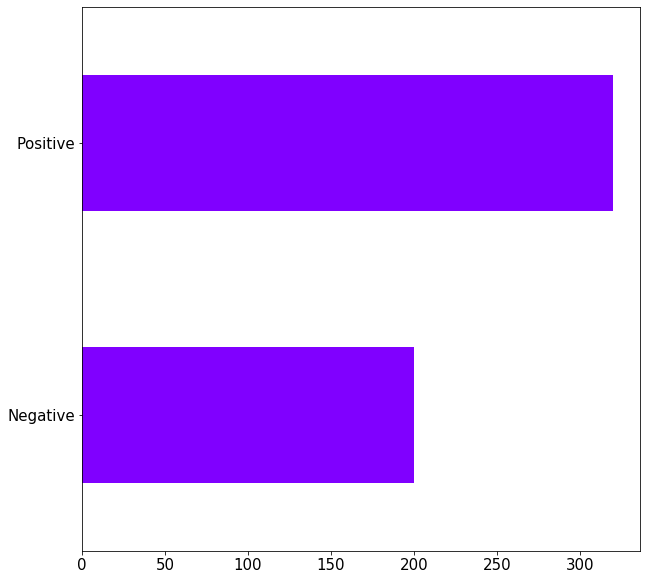

In [71]:
#This is to show a graph of the various counts of values of the class column
data['class'].value_counts(ascending=True).plot(kind='barh', figsize=(10,10), colormap='rainbow',fontsize=15, grid=False);

##### The above output shows the full representation of the positve and negative cases

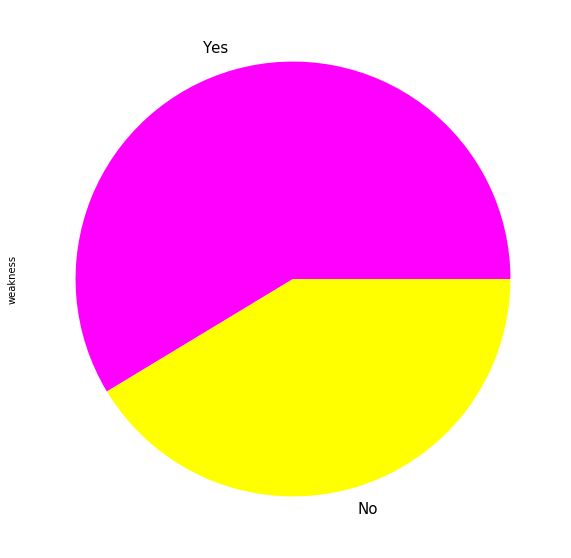

In [76]:
#This is to show a graph of the positive and negative cases reported
data['weakness'].value_counts().plot(kind='pie', figsize=(10,10), colormap='spring',fontsize=15, grid=True);

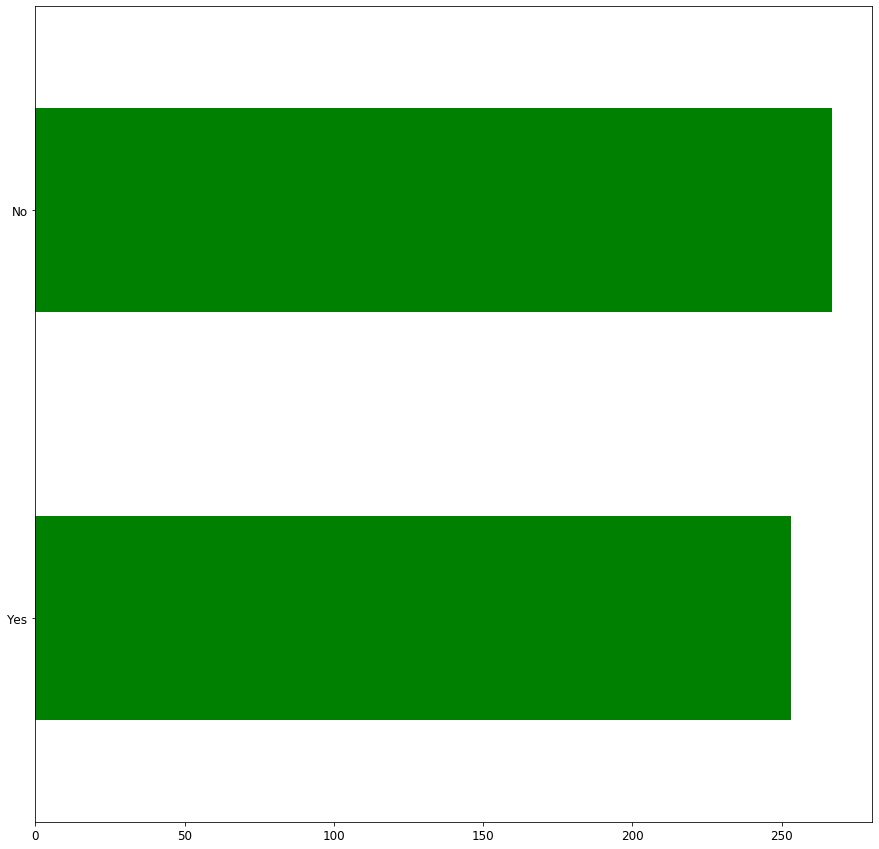

In [79]:
#This is to show a graph of the report on Itching
data['Itching'].value_counts(ascending=True).plot(kind='barh', figsize=(15,15), colormap='ocean',fontsize=12, grid=False);

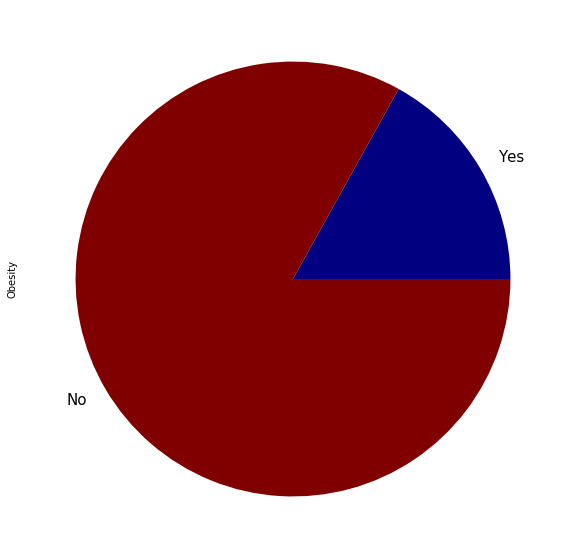

In [81]:
#This is to show a graph of the various counts obessed patients
data['Obesity'].value_counts(ascending=True).plot(kind='pie', figsize=(10,10), colormap='jet',fontsize=15, grid=True);

##### the graph about shows how fewer patients had issues with obesity

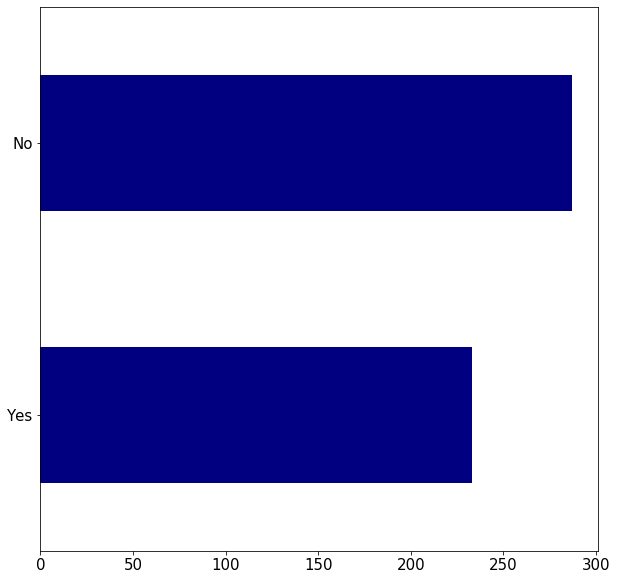

In [84]:
#This is to show a graph of the various polydipsia(excessive thirst)
data['Polydipsia'].value_counts(ascending=True).plot(kind='barh', figsize=(10,10), colormap='jet',fontsize=15, grid=False);

##### The above shows that the Polydipsia was not an issue for a majority of the patients

## (b) Multivariate Visualizations Of Some Columns

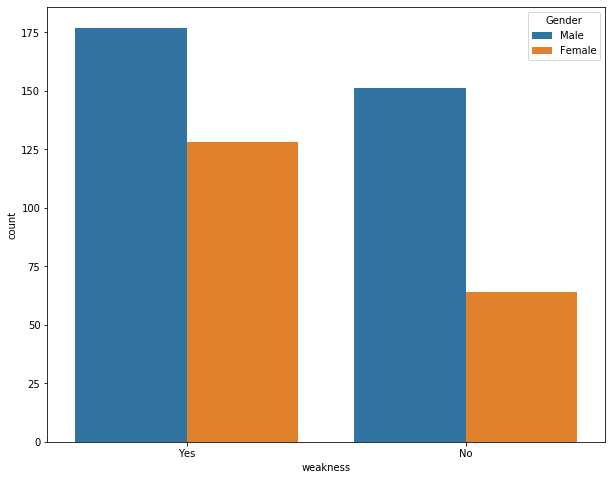

In [94]:
#This shows the relationship between gender and weakness according to the dataset
plt.figure(figsize=(10,8))
sns.countplot(x='weakness', data=data, hue='Gender')
plt.show()

##### The graph above shows that for more men who were diabetic had weakness than their female counterparts who were also diabetic. On the other hand, there is still a large number of  potential diabetic men who show weakness as opposed to the women. So largely diabetic men and women and potential patients, men show signs of weakness while a few of the women show these signs.

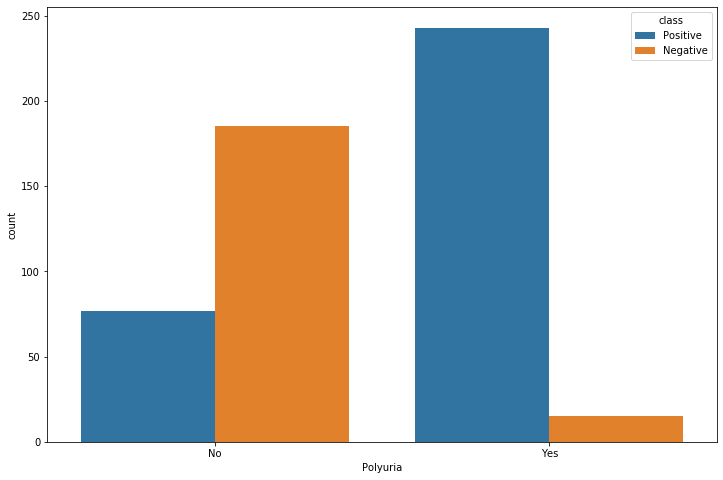

In [106]:
#This shows the relationship between Age and class according to the dataset
plt.figure(figsize=(12,8))
sns.countplot(x='Polyuria', data=data, hue='class')

##### The above graph shows the relationship between Polyuria and class. There is a noticeable correlation between the presence of polyuria and diabetes. Most of the patients with diabetes had polyuria.

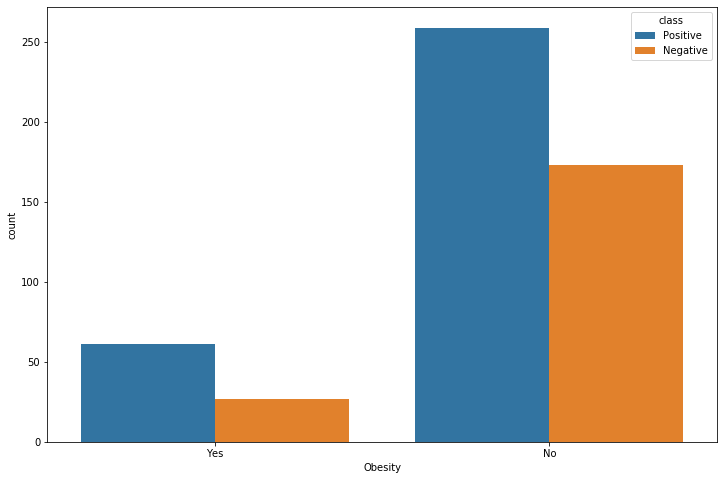

In [101]:
#This is just a reverse of the Obesity and class
plt.figure(figsize=(12,8))
sns.countplot(x='Obesity', data=data, hue='class');

##### From the above, obessed patients who were diabetic were more than obessed people who had the potential. On the other hand, more people who were not obessed had diabetes. Does this mean than obessity cannot be a main indicator for diabetes? Because according to the graph, more people who were not obessed had diabetes. 

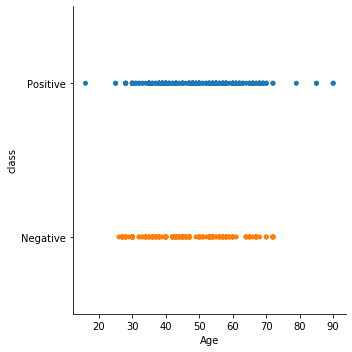

In [107]:
#This shows the relationship between age and race.
sns.catplot(x="Age", y="class", jitter=False, data=data);

##### The above diagram shows the relationship between the Age and class. For the patients, age seems to play a factor, there is a steady increase in the positive cases as the ages increase.¶So clearly, age could be an indicator for diabetes but the distribution is pretty spread out to patients of all ages.

<Figure size 1440x720 with 0 Axes>

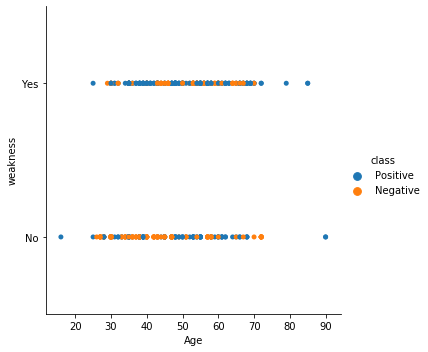

In [113]:
#This shows the relationship between age, weakness and class of death.
plt.figure(figsize=(20,10));
sns.catplot(x="Age", y="weakness", hue='class', jitter=False, data=data);

##### The output above shows the relationship between Age, weakness, and class.  For most of the people experiencing weakness, a lot of them are also experiencing weakness. But the majority of people experiencing the weakness fall between the ages of 30 and 50.